Project root: /Users/sarahdavidson/posner_quantum_dynamics
Looking for models in: /Users/sarahdavidson/posner_quantum_dynamics/src/models
✓ Successfully imported working_posner_model
Model initialized with isotope: P31
Base T2: 1.0 s


### Single Spike Results:


- **Peak [Ca²⁺]**: 212.5 μM
- **Peak [Posner]**: 0.0 nM  
- **Max coherence time**: 800.0 ms
- **Posner lifetime**: ~2.0 s


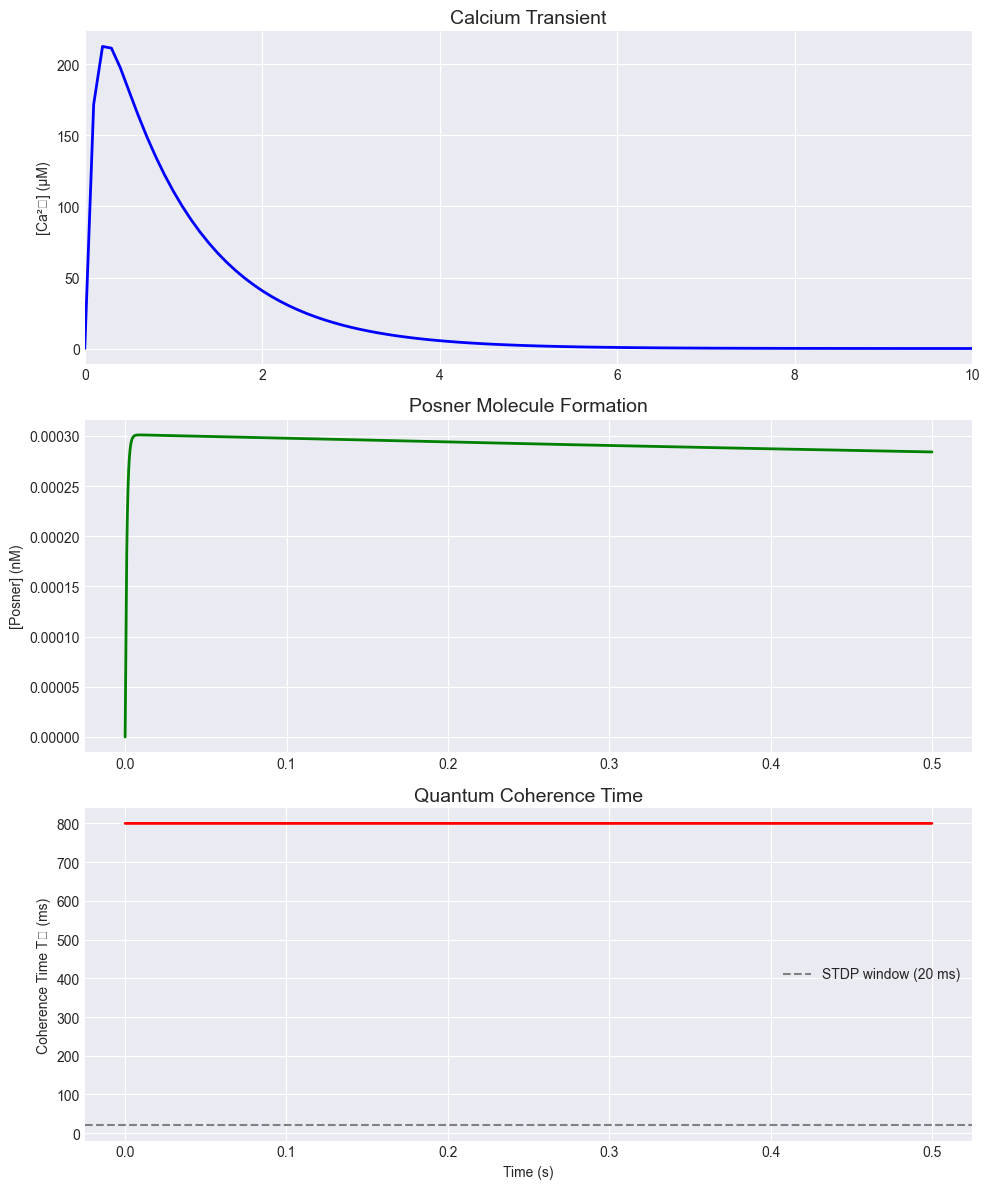

### Experimental Constraints from Literature:

**Calcium:**

- peak_range: 200.0 - 500.0 μM

- baseline_range: 0.0 - 0.2 μM

- decay_time_range: 500.0 - 10000.0 μM

**Phosphate:**

- extracellular_range: 800.0 - 1500.0 μM

**Geometry:**

- cleft_width_range: 0.0 - 0.0 μM

- active_zone_radius_range: 0.1 - 0.3 μM

**Buffers:**

- calmodulin: 5.0 - 20.0 μM

- calbindin: 20.0 - 150.0 μM

### Parameter Validation Results:

✓ PASS **Ca peak**: 212478.3 nM (expected: 200000.0 - 500000.0 nM)

✓ PASS **Ca baseline**: 100.0 nM (expected: 50.0 - 200.0 nM)

✓ PASS **Phosphate**: 1000000.0 nM (expected: 800000.0 - 1500000.0 nM)

✓ PASS **Cleft width**: 20.0 nM (expected: 15.0 - 25.0 nM)

### Thermodynamic Analysis:


- **HPO₄²⁻ fraction at pH 7.3**: 55.7%
- **Ion activity product**: 2.64e-53
- **Saturation index**: 43.4
- **Supersaturated?**: YES ✓
- **Nucleation likely?**: YES ✓


### Missing Physics Components:

**Calcium Buffers** [CRITICAL]

- No competition from calmodulin, calbindin, parvalbumin, etc.

- Effect: Real free [Ca²⁺] could be 10-100× lower

- Fix: Add competitive binding model


**Nucleation Barriers** [HIGH]

- Assumes instant Posner formation

- Effect: Formation could be 1000× slower

- Fix: Add activation energy and critical nucleus size


**Spatial Gradients** [MODERATE]

- Assumes well-mixed compartment

- Effect: Local concentrations could vary 10×

- Fix: Add reaction-diffusion model


**Realistic Decoherence** [CRITICAL]

- Simple concentration-dependent T2

- Effect: T2 could be 10× shorter

- Fix: Add all decoherence mechanisms


**pH Dynamics** [MODERATE]

- Fixed pH, but activity changes it

- Effect: pH could drop by 0.2-0.3 units

- Fix: Add pH buffering and dynamics


### Parameters Without Experimental Validation:

**kf_posner** = 0.002

- Current source: NONE - arbitrary choice

- Needed: Literature on calcium phosphate nucleation kinetics


**kr_posner** = 0.5

- Current source: Assumed from 2s lifetime

- Needed: Dissolution kinetics of amorphous calcium phosphate


**t2_base_p31** = 1.0

- Current source: Fisher 2015 theoretical estimate

- Needed: NMR measurements of Posner molecules


### Quick Competition Estimate:

- Calmodulin: ~9.9 μM bound

- Calbindin: ~39.9 μM bound

- ATP: ~1172.4 μM bound


**Result**: Free Ca²⁺ reduced to 0.0% of original

- Without buffers: 212 μM

- With buffers: 0 μM

## 📊 Validation Summary

### Parameter Validation: 4/4 passed

### Thermodynamics: ✓ Favorable

### Missing Physics: 5 critical components


## 🎯 Priority Actions:


1. **Add Calcium Competition** (CRITICAL)
   - Implement the competitive binding model
   - Re-run to see if Posner can still form

2. **Find Real Kinetic Parameters** (HIGH)
   - Search: "calcium phosphate nucleation kinetics"
   - Key papers: Wang & Nancollas (2008), Dorozhkin (2012)

3. **Add Realistic Decoherence** (CRITICAL)
   - Implement proper quantum decoherence mechanisms
   - Use QuTiP for accurate calculations

4. **Parameter Sensitivity** (MODERATE)
   - Vary all parameters ±50%
   - Identify which are most critical



Validation complete! See summary above for next steps.


In [1]:
# %% [markdown]
# # Posner Model Validation Notebook
# 
# This notebook will validate your `working_posner_model.py` against experimental constraints.
# Run each cell in order to see how your model performs.

# %% [markdown]
# ## Setup and Imports

# %%
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

# Since we're in the notebooks directory, go up one level to project root
project_root = os.path.dirname(os.getcwd())
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'src'))

print(f"Project root: {project_root}")
print(f"Looking for models in: {os.path.join(project_root, 'src', 'models')}")


# Set up plotting
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

# %% [markdown]
# ## Step 1: Load and Test Your Current Model

# %%
# Import your existing model
try:
    from models.working_posner_model import WorkingPosnerModel, WorkingParameters
    print("✓ Successfully imported working_posner_model")
except ImportError as e:
    print("✗ Error importing model:")
    print(f"  {e}")
    print("\nMake sure you're running this notebook from your project root directory")

# %%
# Initialize and run your model
model = WorkingPosnerModel(isotope='P31')
print(f"Model initialized with isotope: {model.isotope}")
print(f"Base T2: {model.t2_base} s")

# Run single spike simulation
results = model.simulate_single_spike()

# Display key results
display(Markdown("### Single Spike Results:"))
display(Markdown(f"""
- **Peak [Ca²⁺]**: {np.max(results['calcium']) * 1e6:.1f} μM
- **Peak [Posner]**: {results['max_posner_nM']:.1f} nM  
- **Max coherence time**: {results['max_coherence_ms']:.1f} ms
- **Posner lifetime**: ~{1/model.params.kr_posner:.1f} s
"""))

# %%
# Visualize the dynamics
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Calcium dynamics
ax = axes[0]
ax.plot(results['time'] * 1000, results['calcium'] * 1e6, 'b-', linewidth=2)
ax.set_ylabel('[Ca²⁺] (μM)')
ax.set_title('Calcium Transient', fontsize=14)
ax.set_xlim(0, 10)  # First 10 ms

# Posner dynamics
ax = axes[1]
ax.plot(results['time'], results['posner'] * 1e9, 'g-', linewidth=2)
ax.set_ylabel('[Posner] (nM)')
ax.set_title('Posner Molecule Formation', fontsize=14)

# Coherence time
ax = axes[2]
mask = results['posner'] > 1e-15  # Only plot where Posner exists
ax.plot(results['time'][mask], results['coherence_time'][mask] * 1000, 'r-', linewidth=2)
ax.axhline(20, color='gray', linestyle='--', label='STDP window (20 ms)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Coherence Time T₂ (ms)')
ax.set_title('Quantum Coherence Time', fontsize=14)
ax.legend()

plt.tight_layout()
plt.show()

# %% [markdown]
# ## Step 2: Define Experimental Constraints

# %%
# Define known experimental constraints
constraints = {
    'calcium': {
        'peak_range': (200e-6, 500e-6),  # M
        'baseline_range': (50e-9, 200e-9),  # M
        'decay_time_range': (0.5e-3, 10e-3),  # s
        'source': 'Schneggenburger & Neher, 2005'
    },
    'phosphate': {
        'extracellular_range': (0.8e-3, 1.5e-3),  # M
        'source': 'Bevington et al., 2008'
    },
    'geometry': {
        'cleft_width_range': (15e-9, 25e-9),  # m
        'active_zone_radius_range': (100e-9, 300e-9),  # m
        'source': 'Schikorski & Stevens, 1997'
    },
    'buffers': {
        'calmodulin': (5e-6, 20e-6),  # M
        'calbindin': (20e-6, 150e-6),  # M
        'source': 'Schwaller, 2010'
    }
}

# Display constraints
display(Markdown("### Experimental Constraints from Literature:"))
for category, params in constraints.items():
    display(Markdown(f"**{category.capitalize()}:**"))
    for key, value in params.items():
        if key != 'source' and isinstance(value, tuple):
            display(Markdown(f"- {key}: {value[0]*1e6:.1f} - {value[1]*1e6:.1f} μM"))

# %% [markdown]
# ## Step 3: Validate Model Parameters

# %%
def validate_parameter(param_name, value, expected_range):
    """Check if parameter is within expected range"""
    in_range = expected_range[0] <= value <= expected_range[1]
    status = "✓ PASS" if in_range else "✗ FAIL"
    return {
        'status': status,
        'value': value,
        'range': expected_range,
        'in_range': in_range
    }

# Validate current model parameters
validation_results = {}

# Check calcium dynamics
ca_peak = np.max(results['calcium'])
ca_baseline = model.params.ca_baseline

validation_results['Ca peak'] = validate_parameter(
    'Ca peak', ca_peak, constraints['calcium']['peak_range']
)
validation_results['Ca baseline'] = validate_parameter(
    'Ca baseline', ca_baseline, constraints['calcium']['baseline_range']
)

# Check phosphate
validation_results['Phosphate'] = validate_parameter(
    'Phosphate', model.params.po4_baseline, constraints['phosphate']['extracellular_range']
)

# Check geometry
validation_results['Cleft width'] = validate_parameter(
    'Cleft width', model.params.cleft_width, constraints['geometry']['cleft_width_range']
)

# Display validation results
display(Markdown("### Parameter Validation Results:"))
for param, result in validation_results.items():
    display(Markdown(f"{result['status']} **{param}**: {result['value']*1e9:.1f} nM "
                    f"(expected: {result['range'][0]*1e9:.1f} - {result['range'][1]*1e9:.1f} nM)"))

# %% [markdown]
# ## Step 4: Check Thermodynamic Feasibility

# %%
def check_thermodynamics(ca_conc, po4_conc, pH=7.3):
    """Check if Posner formation is thermodynamically feasible"""
    
    # Calculate HPO4²⁻ fraction at pH 7.3
    pKa2 = 7.20
    hpo4_fraction = 1 / (1 + 10**(pKa2 - pH))
    
    # Effective phosphate concentration
    po4_effective = po4_conc * hpo4_fraction
    
    # Ion activity product for Ca9(PO4)6
    iap = (ca_conc**9) * (po4_effective**6)
    
    # Rough estimate of Ksp for Posner
    ksp_posner = 1e-96
    
    # Saturation index
    si = np.log10(iap / ksp_posner)
    
    return {
        'hpo4_fraction': hpo4_fraction,
        'ion_activity_product': iap,
        'saturation_index': si,
        'supersaturated': si > 0,
        'nucleation_likely': si > 2  # Need significant supersaturation
    }

# Check at peak calcium
thermo = check_thermodynamics(ca_peak, model.params.po4_baseline)

display(Markdown("### Thermodynamic Analysis:"))
display(Markdown(f"""
- **HPO₄²⁻ fraction at pH 7.3**: {thermo['hpo4_fraction']*100:.1f}%
- **Ion activity product**: {thermo['ion_activity_product']:.2e}
- **Saturation index**: {thermo['saturation_index']:.1f}
- **Supersaturated?**: {'YES ✓' if thermo['supersaturated'] else 'NO ✗'}
- **Nucleation likely?**: {'YES ✓' if thermo['nucleation_likely'] else 'NO ✗'}
"""))

# %% [markdown]
# ## Step 5: Identify Missing Physics

# %%
# List missing components
missing_physics = {
    'Calcium Buffers': {
        'impact': 'CRITICAL',
        'description': 'No competition from calmodulin, calbindin, parvalbumin, etc.',
        'effect': 'Real free [Ca²⁺] could be 10-100× lower',
        'solution': 'Add competitive binding model'
    },
    'Nucleation Barriers': {
        'impact': 'HIGH',
        'description': 'Assumes instant Posner formation',
        'effect': 'Formation could be 1000× slower',
        'solution': 'Add activation energy and critical nucleus size'
    },
    'Spatial Gradients': {
        'impact': 'MODERATE',
        'description': 'Assumes well-mixed compartment',
        'effect': 'Local concentrations could vary 10×',
        'solution': 'Add reaction-diffusion model'
    },
    'Realistic Decoherence': {
        'impact': 'CRITICAL',
        'description': 'Simple concentration-dependent T2',
        'effect': 'T2 could be 10× shorter',
        'solution': 'Add all decoherence mechanisms'
    },
    'pH Dynamics': {
        'impact': 'MODERATE',
        'description': 'Fixed pH, but activity changes it',
        'effect': 'pH could drop by 0.2-0.3 units',
        'solution': 'Add pH buffering and dynamics'
    }
}

display(Markdown("### Missing Physics Components:"))
for component, details in missing_physics.items():
    display(Markdown(f"**{component}** [{details['impact']}]"))
    display(Markdown(f"- {details['description']}"))
    display(Markdown(f"- Effect: {details['effect']}"))
    display(Markdown(f"- Fix: {details['solution']}\n"))

# %% [markdown]
# ## Step 6: Parameter Uncertainty Analysis

# %%
# Check which parameters have no experimental basis
uncertain_params = {
    'kf_posner': {
        'current_value': model.params.kf_posner,
        'source': 'NONE - arbitrary choice',
        'needed': 'Literature on calcium phosphate nucleation kinetics'
    },
    'kr_posner': {
        'current_value': model.params.kr_posner,
        'source': 'Assumed from 2s lifetime',
        'needed': 'Dissolution kinetics of amorphous calcium phosphate'
    },
    't2_base_p31': {
        'current_value': model.params.t2_base_p31,
        'source': 'Fisher 2015 theoretical estimate',
        'needed': 'NMR measurements of Posner molecules'
    }
}

display(Markdown("### Parameters Without Experimental Validation:"))
for param, info in uncertain_params.items():
    display(Markdown(f"**{param}** = {info['current_value']}"))
    display(Markdown(f"- Current source: {info['source']}"))
    display(Markdown(f"- Needed: {info['needed']}\n"))

# %% [markdown]
# ## Step 7: Simple Competition Test

# %%
# Estimate effect of calcium buffers
display(Markdown("### Quick Competition Estimate:"))

# Typical buffer concentrations
buffers = {
    'Calmodulin': {'conc': 10e-6, 'Kd': 2e-6},
    'Calbindin': {'conc': 40e-6, 'Kd': 0.5e-6},
    'ATP': {'conc': 2e-3, 'Kd': 150e-6}
}

# At peak calcium, estimate binding
ca_free_no_buffers = ca_peak
ca_bound_total = 0

for name, props in buffers.items():
    fraction_bound = ca_peak / (ca_peak + props['Kd'])
    ca_bound = props['conc'] * fraction_bound
    ca_bound_total += ca_bound
    display(Markdown(f"- {name}: ~{ca_bound*1e6:.1f} μM bound"))

ca_free_with_buffers = max(0, ca_peak - ca_bound_total)
reduction_factor = ca_free_with_buffers / ca_free_no_buffers

display(Markdown(f"\n**Result**: Free Ca²⁺ reduced to {reduction_factor*100:.1f}% of original"))
display(Markdown(f"- Without buffers: {ca_free_no_buffers*1e6:.0f} μM"))
display(Markdown(f"- With buffers: {ca_free_with_buffers*1e6:.0f} μM"))

# %% [markdown]
# ## Summary and Next Steps

# %%
display(Markdown("## 📊 Validation Summary"))

# Count passes and fails
passes = sum(1 for r in validation_results.values() if r['in_range'])
total = len(validation_results)

display(Markdown(f"### Parameter Validation: {passes}/{total} passed"))
display(Markdown(f"### Thermodynamics: {'✓ Favorable' if thermo['nucleation_likely'] else '✗ Unfavorable'}"))
display(Markdown(f"### Missing Physics: {len(missing_physics)} critical components"))

display(Markdown("\n## 🎯 Priority Actions:"))
display(Markdown("""
1. **Add Calcium Competition** (CRITICAL)
   - Implement the competitive binding model
   - Re-run to see if Posner can still form

2. **Find Real Kinetic Parameters** (HIGH)
   - Search: "calcium phosphate nucleation kinetics"
   - Key papers: Wang & Nancollas (2008), Dorozhkin (2012)

3. **Add Realistic Decoherence** (CRITICAL)
   - Implement proper quantum decoherence mechanisms
   - Use QuTiP for accurate calculations

4. **Parameter Sensitivity** (MODERATE)
   - Vary all parameters ±50%
   - Identify which are most critical
"""))

# %%
# Save results
validation_summary = {
    'model_outputs': {
        'peak_calcium_uM': np.max(results['calcium']) * 1e6,
        'peak_posner_nM': results['max_posner_nM'],
        'max_coherence_ms': results['max_coherence_ms']
    },
    'validation_passed': {k: v['in_range'] for k, v in validation_results.items()},
    'thermodynamics': thermo,
    'missing_physics': list(missing_physics.keys()),
    'uncertain_parameters': list(uncertain_params.keys())
}

# You can save this to JSON if needed
# import json
# with open('validation_results.json', 'w') as f:
#     json.dump(validation_summary, f, indent=2)

print("\nValidation complete! See summary above for next steps.")

In [2]:
# Debug cell - add this after the simulation
print("Debug info:")
print(f"Max Posner (M): {np.max(results['posner'])}")
print(f"Max Posner (nM): {np.max(results['posner']) * 1e9}")
print(f"Non-zero Posner values: {np.sum(results['posner'] > 0)}")
print(f"First 10 Posner values (nM):", results['posner'][:10] * 1e9)

# Try running a spike train instead
train_results = model.simulate_spike_train(n_spikes=10, frequency=10.0)
print(f"\nSpike train max Posner: {train_results['max_posner_nM']} nM")

Debug info:
Max Posner (M): 3.010333621957264e-13
Max Posner (nM): 0.0003010333621957264
Non-zero Posner values: 4999
First 10 Posner values (nM): [0.00000000e+00 1.91368007e-05 4.28189753e-05 6.63664615e-05
 8.83782024e-05 1.08529706e-04 1.26841335e-04 1.43436028e-04
 1.58459816e-04 1.72056412e-04]

Spike train max Posner: 0.0016471673453149842 nM
